In [26]:
%load_ext autoreload
%autoreload 2

from typing import Any, cast, Dict, Tuple

import pandas as pd
import numpy as np
from sklearn.base import clone

from models import models, scalers
from read_data import read_datasets
from data_cleaning import prep_dataframe, DataCleaner
from training import split_x_y, calc_stats, select_past, train_test_year

from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Datasets

Copies of the dataset, each with a different scaler applies, are generated and stored for usage in training.

In [19]:
dep_var = "Log(Rmax)"
use_crossval = True

all_data = read_datasets()
num_sets = len(all_data)
all_data = prep_dataframe(all_data, dep_var)

num_sets


Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.200GHz' @ Earth Simulator, 2009
Unknown processor: 'NEC', full name: 'NEC  3.20GHz' @ Earth Simulator, 2009
Unknown processor: 'Xeon EM64T', full name: 'Xeon EM64T  3.60GHz' @ Thunderbird, 2006


20

In [23]:
# Train model
def train_model(model, train: Tuple[pd.DataFrame, pd.Series], test: Tuple[pd.DataFrame, pd.Series]) -> Dict[str, Any]:
    model.fit(train[0], train[1])

    pred_y = model.predict(test[0])
    return calc_stats(test[1], pred_y, print_res=False)


In [72]:
# Hard code in scaler for now
scaler = scalers["Robust"]

results = pd.DataFrame(columns=["name", "past_sets", "scaler", "r2", "mae", "mape", "mse"])

num_to_sweep = (num_sets + 1) - 2
sets_pbar = tqdm(total=num_to_sweep)
total_pbar = tqdm(total=num_to_sweep * len(models))

for past_sets in range(2, num_sets+1):
    cleaner = DataCleaner(scaler, dep_var)

    data = select_past(all_data, past_sets)
    data = cleaner.fit_transform(data)
    train, test = train_test_year(data)

    train, test = split_x_y([train, test], dep_var)

    for name, model in models.items():
        res = train_model(model, train, test)
        res["name"] = name
        res["past_sets"] = past_sets
        
        results = results.append(res, ignore_index=True)

        total_pbar.update(1)
    
    sets_pbar.update(1)

sets_pbar.close()
total_pbar.close()

results


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

Filtered duplicates to go from 1000 rows to 436


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 1500 rows to 491


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 2000 rows to 541


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 2500 rows to 607


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 3000 rows to 694


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 3500 rows to 834


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 4000 rows to 956


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 4500 rows to 1094
Filtered duplicates to go from 5000 rows to 1211
Filtered duplicates to go from 5500 rows to 1321


/home/bdoney/ML-rewrite/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Filtered duplicates to go from 6000 rows to 1483
Filtered duplicates to go from 6500 rows to 1622
Filtered duplicates to go from 7000 rows to 1697
Filtered duplicates to go from 7500 rows to 1782
Filtered duplicates to go from 8000 rows to 1888
Filtered duplicates to go from 8500 rows to 2023
Filtered duplicates to go from 9000 rows to 2164
Filtered duplicates to go from 9500 rows to 2314
Filtered duplicates to go from 10000 rows to 2476


,name,past_sets,scaler,r2,mae,mape,mse
0,lr_1,2,NaN,-0.192417,0.627305,0.070099,0.741547
1,knn_1,2,NaN,0.494690,0.392804,0.044090,0.314245
2,knn_2,2,NaN,0.390794,0.443196,0.049792,0.378857
3,knn_3,2,NaN,0.396045,0.430599,0.048329,0.375591
4,knn_4,2,NaN,0.344198,0.474125,0.053122,0.407834
...,...,...,...,...,...,...,...
394,mlp_1,20,NaN,-2.270457,0.924745,0.106595,2.033851
395,dnn1_1,20,NaN,0.608786,0.375625,0.043506,0.243291
396,dnn2_1,20,NaN,-1.699497,0.817681,0.093361,1.678779
397,xgb_1,20,NaN,0.659717,0.318797,0.036031,0.211617


In [39]:
results.to_csv("out/all_results_top.csv")


In [73]:
results.sort_values("r2", axis=0)

,name,past_sets,scaler,r2,mae,mape,mse
385,svr_2,20,NaN,-10.094285,2.515832,0.291227,6.899380
364,svr_2,19,NaN,-9.039829,2.378770,0.274835,6.243628
343,svr_2,18,NaN,-8.110923,2.253194,0.259885,5.665955
322,svr_2,17,NaN,-7.387403,2.151482,0.247810,5.216008
301,svr_2,16,NaN,-6.595936,2.031457,0.233481,4.723806
...,...,...,...,...,...,...,...
292,xgb_1,15,NaN,0.757811,0.283666,0.032305,0.150614
208,xgb_1,11,NaN,0.777660,0.268249,0.030350,0.138270
227,dnn1_1,12,NaN,0.783540,0.273263,0.031078,0.134614
124,xgb_1,7,NaN,0.790050,0.259757,0.029132,0.130565


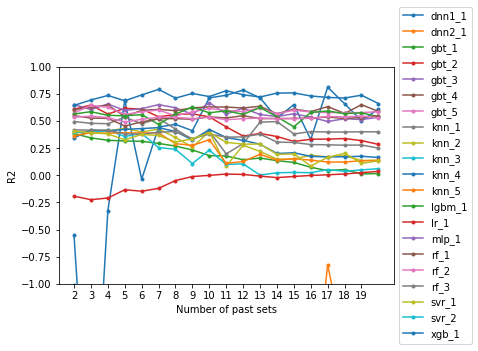

In [79]:
import matplotlib.pyplot as plt

for p in results.groupby(["name"]):
    name, res = p
    data = results[results["name"] == name]
    plt.plot(res["past_sets"], res["r2"], linestyle="-", marker=".", label=name)
    plt.xticks(range(2, num_sets))
    plt.xlabel("Number of past sets")
    plt.ylabel("R2")

plt.ylim(-1, 1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Text(0.5, 0, 'past_sets')

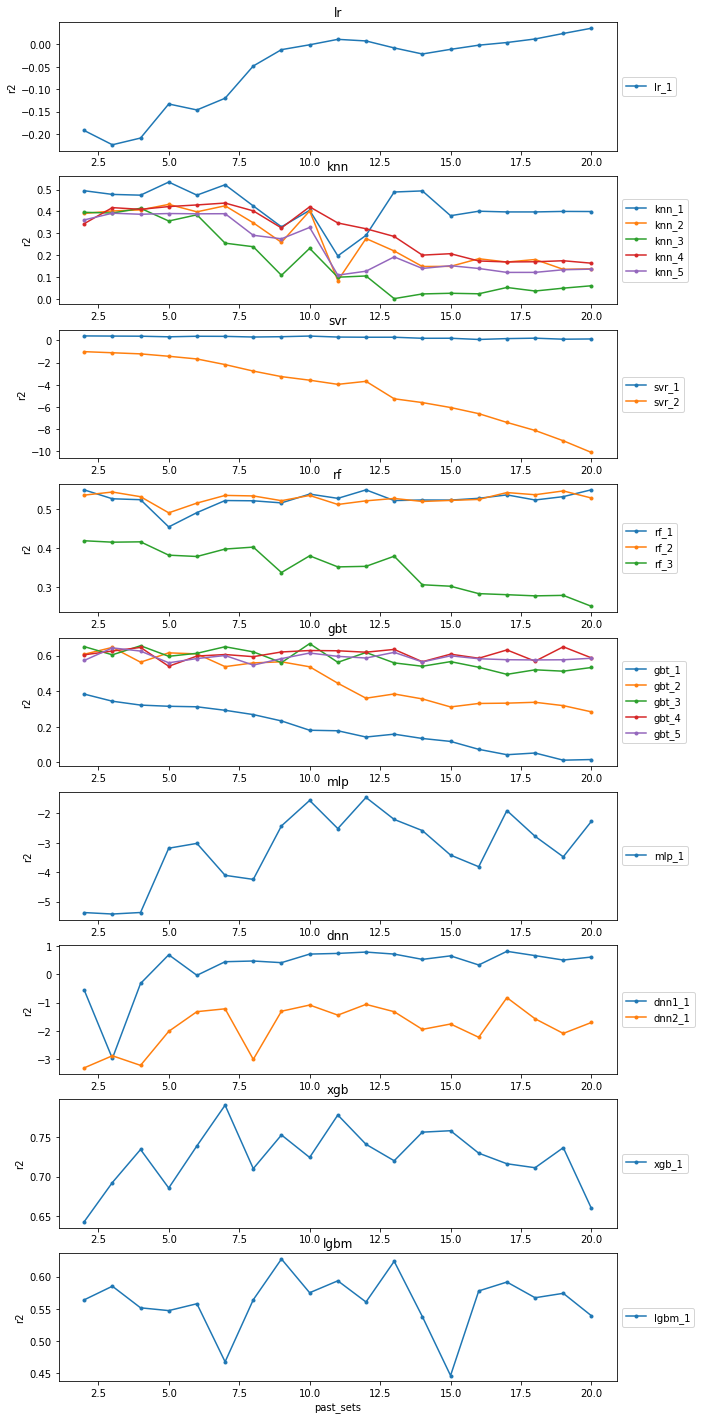

In [94]:
import matplotlib.pyplot as plt

subplot_dict = {"lr":  0, "knn": 1, "svr": 2, "rf":  3,
                "gbt": 4, "mlp": 5, "dnn": 6, "xgb": 7, "lgbm": 8}
fig, axes = plt.subplots(len(subplot_dict), figsize=(10, 25))

for name in models.keys():
    for name_part, val in subplot_dict.items():
        if name_part in name:
            plot = axes[val]
            break
    else:
        raise ValueError(f"Invalid model name '{name}'")

    res = results[results["name"] == name]
    plot.plot(res["past_sets"], res["r2"], linestyle="-", marker=".", label=name)

for name_part, val in subplot_dict.items():
    plot = axes[val]
    plot.set_title(name_part)
    plot.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plot.set_ylabel("r2")
axes[-1].set_xlabel("past_sets")
